# Workshop: Using Cloud tools for Information Retrieval

## Objective:
Learn how to use two powerful vector databases, ChromaDB and Pinecone, for performing similarity searches with text embeddings. Vector databases are essential tools in the field of Information Retrieval (IR) and are widely used in various applications such as search engines, recommendation systems, and natural language processing (NLP).

In [1]:
# Importar el cliente de ChromaDB para manejar la base de datos de vectores
import chromadb

# Importar PyTorch y Hugging Face Transformers para manejar el tokenizador y el modelo
import torch
from transformers import AutoTokenizer, AutoModel

c:\Users\Ronny Amores\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Importar Pinecone y la especificación para configuración sin servidor
from pinecone import Pinecone, ServerlessSpec

# Crear una instancia del cliente Pinecone con la clave de API proporcionada
pc = Pinecone(api_key="621f8e99-07e7-4078-b623-8493cb0cc7cb")

# Crear un índice en Pinecone con el nombre 'jueves300', especificando la dimensión, métrica y configuración sin servidor
pc.create_index(
    name="jueves300",  # Nombre del índice
    dimension=300,  # Dimensión del vector (debe coincidir con el modelo usado)
    metric="cosine",  # Métrica utilizada para la similitud (coseno en este caso)
    spec=ServerlessSpec(
        cloud="aws",  # Proveedor de la nube
        region="us-east-1"  # Región de la nube
    )
)

In [3]:
# Crear un índice en Pinecone con el nombre 'jueves300', especificando la dimensión, métrica y configuración sin servidor
pc.create_index(
    name="jueves300",  # Nombre del índice
    dimension=300,  # Dimensión del vector (debe coincidir con el modelo usado)
    metric="cosine",  # Métrica utilizada para la similitud (coseno en este caso)
    spec=ServerlessSpec(
        cloud="aws",  # Proveedor de la nube
        region="us-east-1"  # Región de la nube
    )
)

In [4]:
# Crear una instancia del índice en Pinecone
index = pc.Index("jueves300")

In [5]:
# Importar pandas para manejar el DataFrame
import pandas as pd



# Cargar el DataFrame desde un archivo CSV
wine_df = pd.read_csv("data/winemag-data-130k-v2.csv")
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
# Importar el módulo de descarga de modelos de Gensim
import gensim.downloader as api

# Cargar el modelo pre-entrenado de Word2Vec (Google News)
word2vec_model = api.load('word2vec-google-news-300')

In [7]:

# Seleccionar las primeras 30 descripciones y sus IDs del DataFrame
corpus = wine_df[['Unnamed: 0','description']][:30]

# Mostrar el corpus seleccionado
corpus

,Unnamed: 0,description
0,0,"Aromas include tropical fruit, broom, brimston..."
1,1,"This is ripe and fruity, a wine that is smooth..."
2,2,"Tart and snappy, the flavors of lime flesh and..."
3,3,"Pineapple rind, lemon pith and orange blossom ..."
4,4,"Much like the regular bottling from 2012, this..."
5,5,Blackberry and raspberry aromas show a typical...
6,6,"Here's a bright, informal red that opens with ..."
7,7,This dry and restrained wine offers spice in p...
8,8,Savory dried thyme notes accent sunnier flavor...
9,9,This has great depth of flavor with its fresh ...


In [8]:
import numpy as np

# Función para generar embeddings de Word2Vec a partir de una lista de textos
def generate_word2vec_embeddings(texts):
    embeddings = []  # Lista para almacenar los embeddings
    for text in texts:  # Iterar sobre cada texto en la lista
        tokens = text.lower().split()  # Convertir el texto a minúsculas y dividir en tokens
        # Obtener los vectores de palabras si existen en el modelo
        word_vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
        if word_vectors:  # Si se encontraron vectores de palabras
            # Calcular la media de los vectores de palabras y agregar a los embeddings
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            # Si no se encontraron vectores, agregar un vector de ceros
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return np.array(embeddings)  # Devolver los embeddings como un array de NumPy

# Generar los embeddings de Word2Vec para las descripciones del corpus
word2vec_embeddings = generate_word2vec_embeddings(corpus['description'])

# Imprimir los embeddings generados y su forma
print("Word2Vec Embeddings:", word2vec_embeddings)
print("Word2Vec Shape:", word2vec_embeddings.shape)


Word2Vec Embeddings: [[ 0.08961201  0.02994537  0.01651001 ... -0.06150293  0.08003616
   0.0424881 ]
 [ 0.0043335   0.03103406  0.00594482 ... -0.04978027  0.06455892
  -0.00902507]
 [-0.01267483  0.02049818  0.03032443 ... -0.04003103  0.081967
   0.08878367]
 ...
 [ 0.01143392 -0.00242276  0.01770698 ... -0.02921549 -0.00348239
   0.03066678]
 [ 0.00535366  0.04958234 -0.01933507 ... -0.05190604  0.00845337
   0.05245536]
 [ 0.04411708  0.01201714 -0.00256348 ... -0.04543632  0.05410679
  -0.01553432]]
Word2Vec Shape: (30, 300)


In [19]:
# Generar embeddings para las descripciones del dataset
word2vec_embeddings = generate_word2vec_embeddings(corpus['description'])

# Preparar los vectores para Pinecone con metadatos
vectors = [{'id': str(i), 'values': word2vec_embeddings[i].tolist(), 'metadata': {'genre': 'wine'}} for i in range(len(word2vec_embeddings))]

# Insertar los vectores en Pinecone en el namespace 'ns1'
index.upsert(vectors=vectors, namespace='ns1')

{'upserted_count': 30}

In [20]:
# Consultar el índice para verificar la inserción
print(index.describe_index_stats())

{'dimension': 300,
 'index_fullness': 0.0,
 'namespaces': {'ns1': {'vector_count': 30}, 'vectors': {'vector_count': 30}},
 'total_vector_count': 60}


In [21]:
# Realizar una consulta de ejemplo
query_str = 'coffee smell'  # Cadena de consulta

# Generar el vector de embeddings para la cadena de consulta
query_vector = generate_word2vec_embeddings([query_str])

# Realizar la consulta en el índice de Pinecone
result = index.query(
    namespace="ns1",  # Namespace en el que se está buscando
    vector=query_vector[0].tolist(),  # Vector de embeddings de la consulta
    top_k=3,  # Número de resultados más similares a retornar
    include_values=False  # No incluir los valores de los vectores en los resultados
)

# Mostrar los resultados de la consulta
print(result)

# Obtener las descripciones de los resultados de la consulta
result_ids = [match['id'] for match in result['matches']]  # Obtener los IDs de los resultados
# Filtrar el DataFrame para obtener las descripciones correspondientes a los IDs obtenidos
descriptions = wine_df[wine_df['Unnamed: 0'].isin(map(int, result_ids))]['description']
print(descriptions)

{'matches': [{'id': '27', 'score': 0.611195326, 'values': []},
             {'id': '24', 'score': 0.569107175, 'values': []},
             {'id': '18', 'score': 0.551815, 'values': []}],
 'namespace': 'ns1',
 'usage': {'read_units': 5}}
18    Desiccated blackberry, leather, charred wood a...
24    Aromas of prune, blackcurrant, toast and oak c...
27    Aromas recall ripe dark berry, toast and a whi...
Name: description, dtype: object


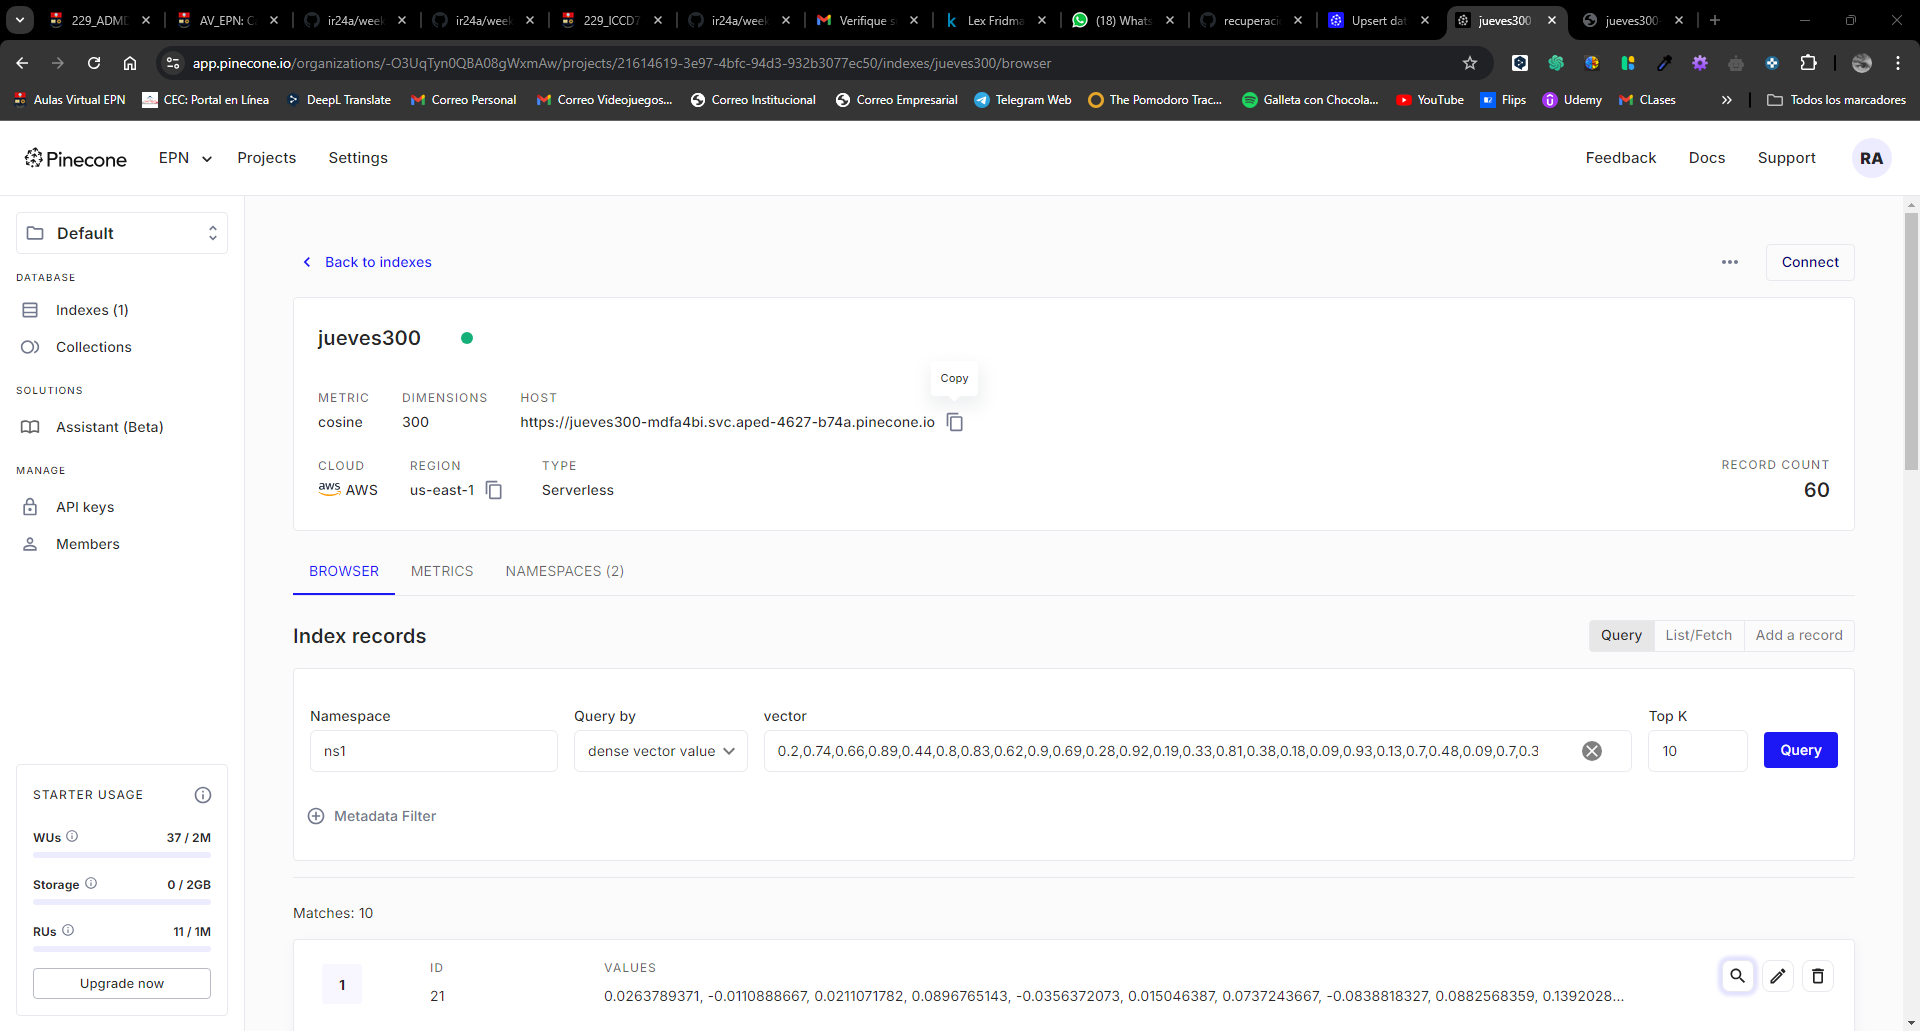

# Uso de ChromaDB en Python
ChromaDB es una base de datos de vectores de código abierto que permite almacenar, indexar y consultar documentos de texto mediante embeddings.

In [1]:
import chromadb
# Crear un cliente ChromaDB
chroma_client = chromadb.Client()


In [2]:
# Crear una colección
collection = chroma_client.create_collection(name="my_collection")


In [3]:
# Cargar el DataFrame
wine_df = pd.read_csv("data/winemag-data-130k-v2.csv")

# Extraer las primeras 30 descripciones y IDs
documents = wine_df['description'][:30].tolist()
ids = wine_df['Unnamed: 0'][:30].astype(str).tolist()

In [4]:
print(documents)

["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.", 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.', 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.', "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country w

In [5]:
# Insertar los 30 documentos en la colección
collection.add(
    documents=documents,
    ids=ids
)

: 

# ERROR EN JUPYTER, EL KERNEL MUERE AL EJECUTAR LA INSERCION CON ADD O UPSERT, SE EJECUTA EL CODE DE CHROMADB EN UN .PY 'ChromaDB.py'

Getting Started <CHROMADB> https://docs.trychroma.com/getting-started

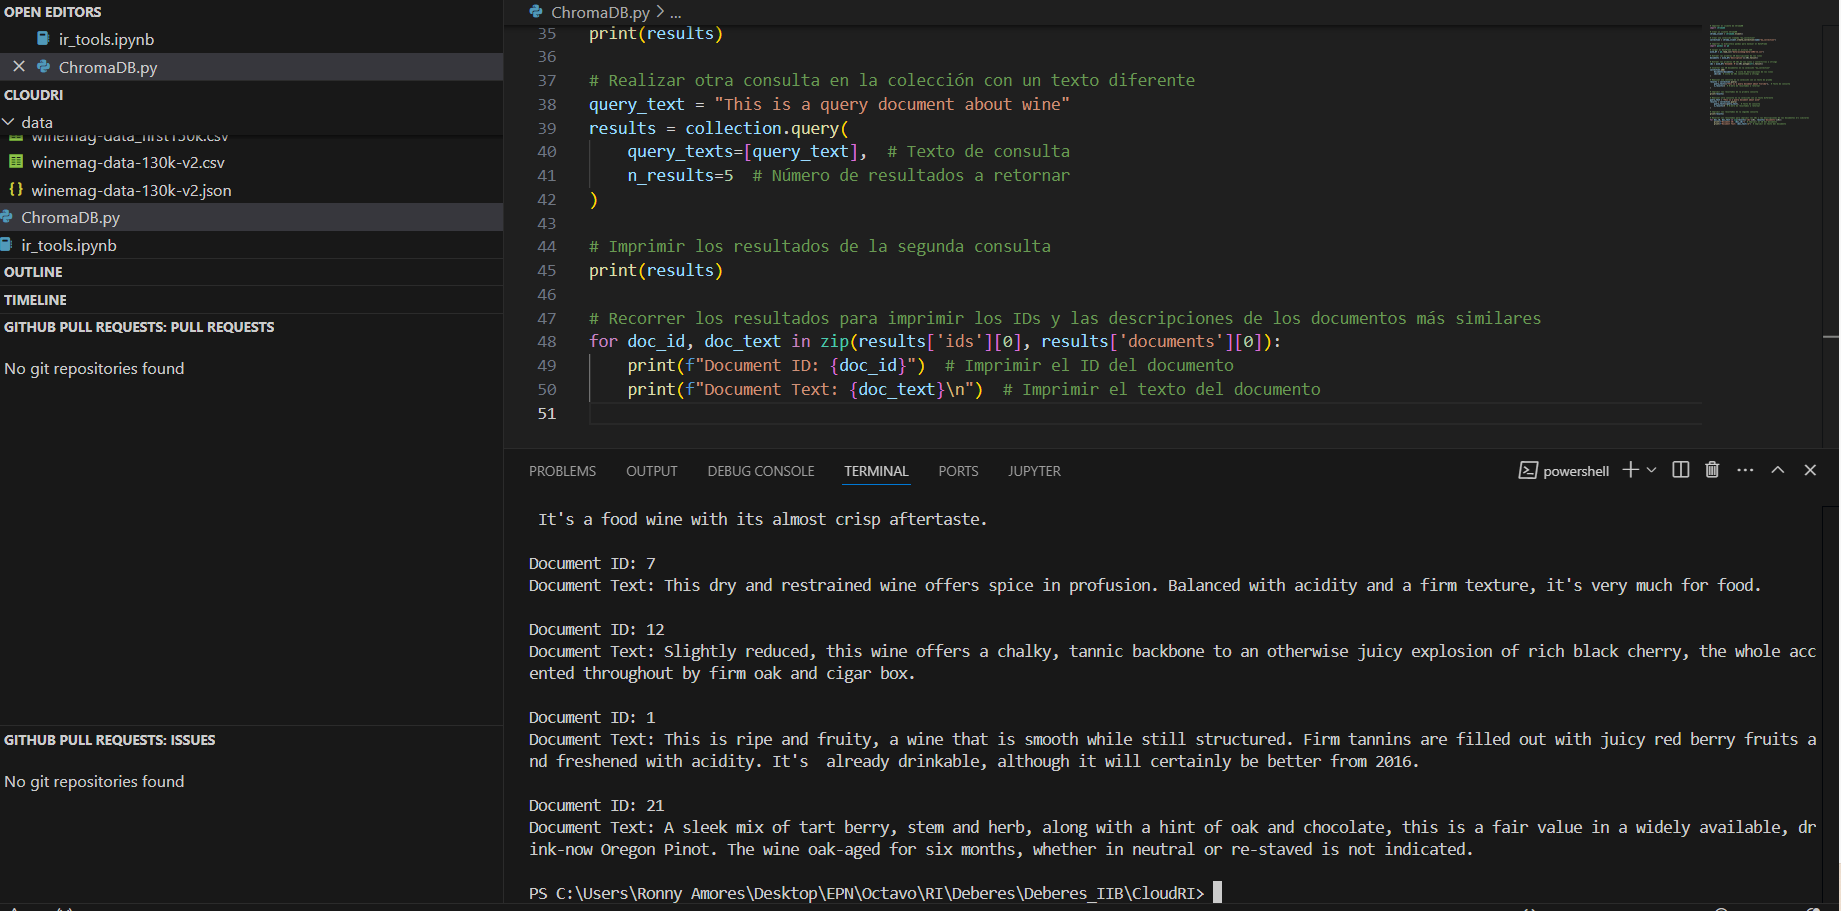